In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import scipy.signal

from tqdm.notebook import tqdm

In [2]:
def make_graph(l=8, inv_k=1/2.0,vlen=100,device='gpu'):
    if device == 'gpu':
        graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    elif device == 'cpu':
        graph = py_gauge_mc.GaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    return graph

def autocorr(x):
    y = x - np.mean(x)
    result = np.correlate(y, y, mode='full')
    result /= np.max(result)
    return result[len(result)//2:]

# L = 12, K = 4 Villain

In [3]:
l = 12
g = make_graph(l=l, inv_k=0.25, vlen=100)
for i in tqdm(range(100)):
    g.run_local_update(20)
    g.run_global_update()
winding_nums = g.simulate_and_get_winding_nums(10000,local_updates_per_step=1,steps_per_sample=1)

  0%|          | 0/100 [00:00<?, ?it/s]

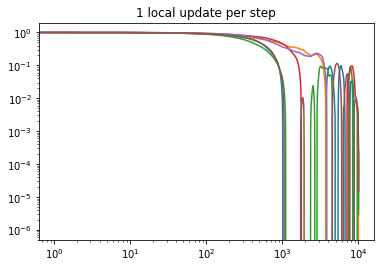

In [4]:
for i in range(winding_nums.shape[1]):
    plt.plot(autocorr(winding_nums[:,i]))
plt.xscale('log')
plt.yscale('log')
plt.title('1 local update per step')
plt.show()

In [5]:
l = 12
g = make_graph(l=l, inv_k=0.25, vlen=100)
for i in tqdm(range(100)):
    g.run_local_update(20)
    g.run_global_update()
winding_nums = g.simulate_and_get_winding_nums(10000,local_updates_per_step=10,steps_per_sample=1)

  0%|          | 0/100 [00:00<?, ?it/s]

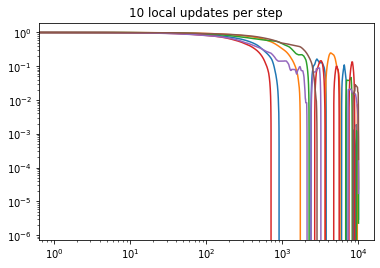

In [6]:
for i in range(winding_nums.shape[1]):
    plt.plot(autocorr(winding_nums[:,i]))
plt.xscale('log')
plt.yscale('log')
plt.title('10 local updates per step')
plt.show()

In [7]:
l = 12
g = make_graph(l=l, inv_k=0.25, vlen=100)
for i in tqdm(range(100)):
    g.run_local_update(20)
    g.run_global_update()
winding_nums = g.simulate_and_get_winding_nums(10000,local_updates_per_step=100,steps_per_sample=1)

  0%|          | 0/100 [00:00<?, ?it/s]

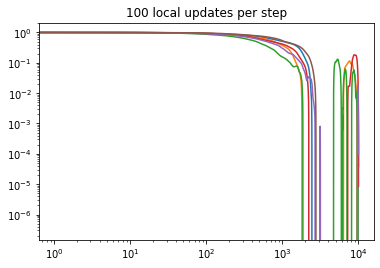

In [8]:
for i in range(winding_nums.shape[1]):
    plt.plot(autocorr(winding_nums[:,i]))
plt.xscale('log')
plt.yscale('log')
plt.title('100 local updates per step')
plt.show()

In [9]:
l = 12
g = make_graph(l=l, inv_k=0.25, vlen=100)
for i in tqdm(range(100)):
    g.run_local_update(20)
    g.run_global_update()
winding_nums = g.simulate_and_get_winding_nums(10000,local_updates_per_step=1,steps_per_sample=10)

  0%|          | 0/100 [00:00<?, ?it/s]

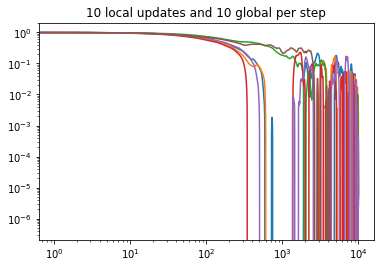

In [10]:
for i in range(winding_nums.shape[1]):
    plt.plot(autocorr(winding_nums[:,i]))
plt.xscale('log')
plt.yscale('log')
plt.title('10 local updates and 10 global per step')
plt.show()

In [11]:
l = 12
g = make_graph(l=l, inv_k=0.25, vlen=100)
for i in tqdm(range(100)):
    g.run_local_update(20)
    g.run_global_update()
winding_nums = g.simulate_and_get_winding_nums(10000,local_updates_per_step=1,steps_per_sample=10)

  0%|          | 0/100 [00:00<?, ?it/s]

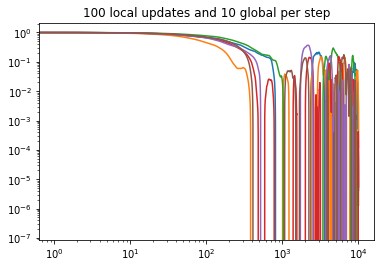

In [12]:
for i in range(winding_nums.shape[1]):
    plt.plot(autocorr(winding_nums[:,i]))
plt.xscale('log')
plt.yscale('log')
plt.title('100 local updates and 10 global per step')
plt.show()

In [13]:
l = 12
g = make_graph(l=l, inv_k=0.25, vlen=100)
for i in tqdm(range(100)):
    g.run_local_update(20)
    g.run_global_update()
winding_nums = g.simulate_and_get_winding_nums(10000,local_updates_per_step=1,steps_per_sample=100)

  0%|          | 0/100 [00:00<?, ?it/s]

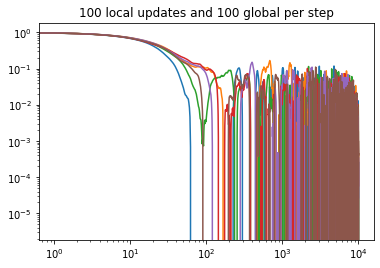

In [14]:
for i in range(winding_nums.shape[1]):
    plt.plot(autocorr(winding_nums[:,i]))
plt.xscale('log')
plt.yscale('log')
plt.title('100 local updates and 100 global per step')
plt.show()

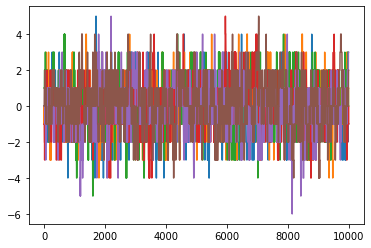

In [16]:
for i in range(winding_nums.shape[1]):
    plt.plot(winding_nums[:,i])
plt.show()